In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start_date = '2015-01-01'
end_date = '2017-01-01'

aal = get_pricing('AAL', start_date=start_date, end_date=end_date)
ual = get_pricing('UAL', start_date=start_date, end_date=end_date)


In [3]:
aal.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,53.222,53.536,52.036,52.859,9507330.0,52.859
2015-01-05 00:00:00+00:00,53.310,53.477,52.301,52.830,10401276.0,52.830
2015-01-06 00:00:00+00:00,53.212,53.369,51.114,52.006,12491282.0,52.006
2015-01-07 00:00:00+00:00,52.340,52.605,51.104,51.967,9316925.0,51.967
2015-01-08 00:00:00+00:00,52.438,53.222,52.212,52.614,8802391.0,52.614


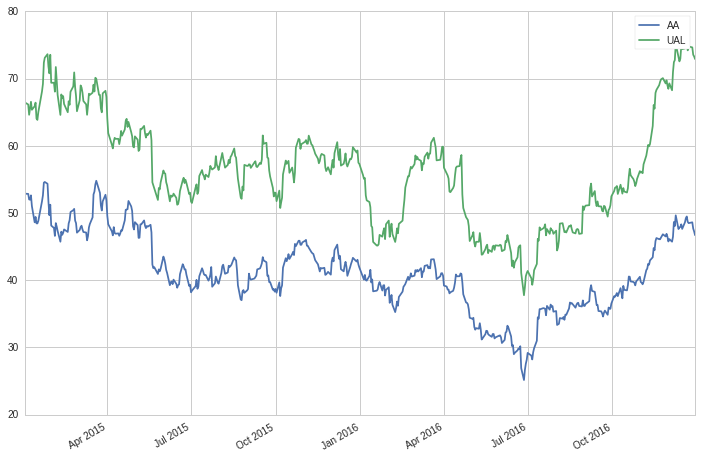

In [4]:
aal['close_price'].plot(figsize = (12, 8), label = 'AA')
ual['close_price'].plot(label = 'UAL')
plt.legend()


In [5]:
np.corrcoef(aal['close_price'], ual['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

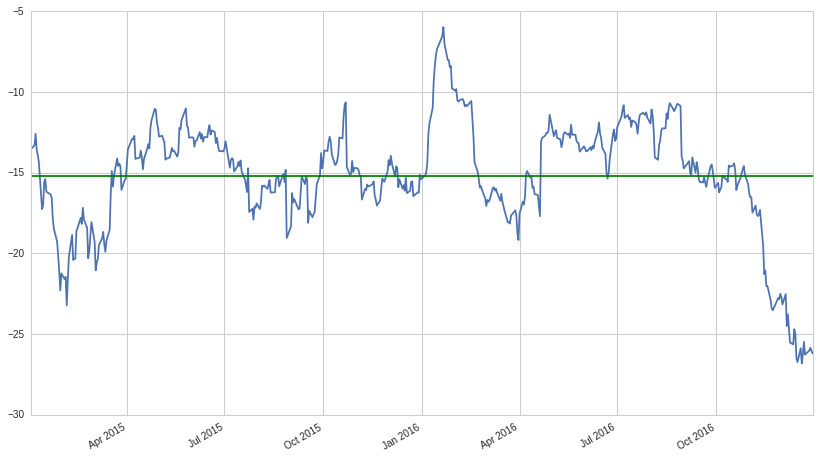

In [6]:
spread = aal['close_price'] - ual['close_price']
spread.plot()
plt.axhline(spread.mean(), c= 'g')


In [7]:
def z_score(x):
    return (x - x.mean()) / x.std()

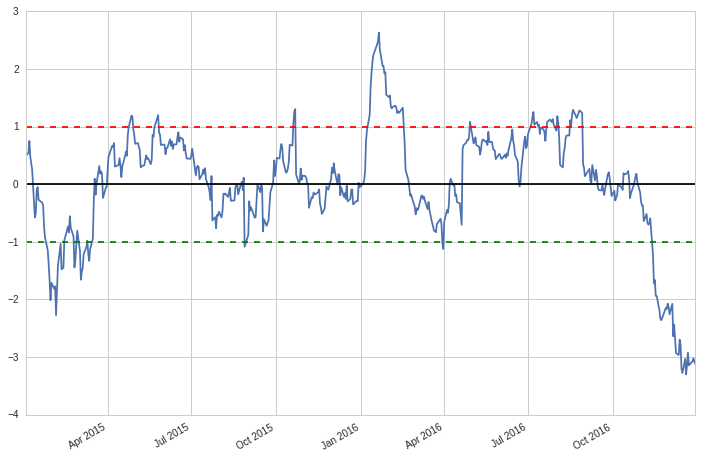

In [8]:
z_score(spread).plot(figsize = (12,8))
plt.axhline(z_score(spread).mean(), c = 'black')
plt.axhline(+1.0, ls = '--', c = 'red')
plt.axhline(-1.0, ls = '--', c  = 'green')

In [14]:
mavg_1 = spread.rolling(1).mean()
mavg_30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()
zscore_30 = (mavg_1 - mavg_30) / std_30

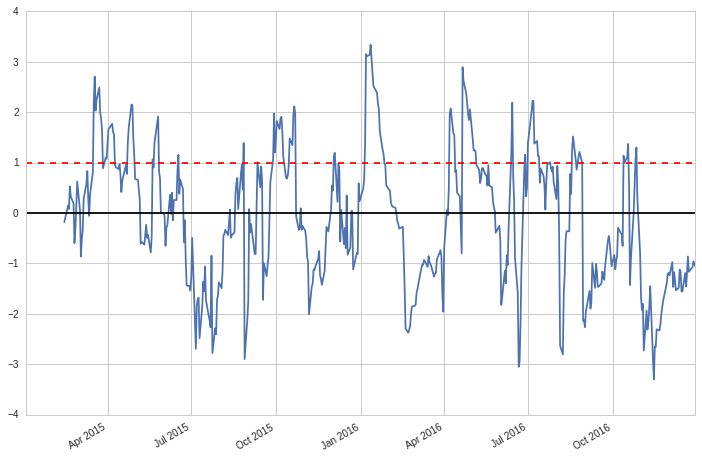

In [18]:
zscore_30.plot(figsize = (12, 8), label = 'Rolling 30-Day Z-Score')
plt.axhline(0, c = 'black')
plt.axhline(1.0, c = 'red', ls = '--')